## ANALISIS DE DATOS AGUSTIN

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from thefuzz import fuzz #libreria para reducir las inconsistencias de las categorias

c:\Users\agust\anaconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#This functions will help in data proccessing

def multi_reversing(df,col_id, col_values):
    """la funcion toma nos da la frecuencia de los datos distribuidos en distintas columnas.
    Toma una variable distribuida en varias columnas (one hot encoding), y aplica la funcion melt para cambiar el formato
    de la tabla a long. Luego devuelve una columna donde aparece el nombre de cada columna, la cantidad de veces que fue
    marcada con una 'x' (si accuracy fue marcada 50 veces, aparecera el str 'accuracy' 50 veces, lo que permite graficar su frecuencia
    de aparicion)

    Args:
        df (dataframe): dataframe con el que se desea trabajar, debe poseer las columnas de id_vars y list_value_vars
        in_id_vars (str): nombre de la columna que se usa como identificador de variables 
        value_vars (str o lista): str o lista con el nombre de las columnas de las cuales se desea obtener los datos (se puede
        obviamente subsetear (p.e. dataframe.iloc['columna_1',...,columna_n']))

    Returns:
        dataframe: _description_
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value == 'x']

def multi_reversing_n(df,col_id, col_values):
    """exactamente lo mismo que multi_reversing, solo que para casos donde lo que se busca es un numero y no una x
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value != 0]

### Emotion elicitation - Plots

 graficos para hojas: techniques:

- frecuencia por modalidad
- frecuencia por technique_name: DONE
- task activo or passive: DONE
- por modalidad visual (pictures, videos, words, other)
- por modalidad auditiva (musica otro)
- elicitation time
- multiple techniques?
- frecuencia desde driving a puzzle

In [3]:
#Import data
data_elicitation = pd.read_csv('../update_data/Tabla Normalizada - Emotion elicitation techniques.csv')
data_elicitation.fillna('-', inplace= True)

In [4]:
elicitation_techq = data_elicitation[data_elicitation['technique_name']!= '-']  #me quedo solo con las rows que usaron tecnicas estandarizadas


In [5]:
#me quedo con la primera row de cada grupo
elicitation_techq = elicitation_techq.groupby(['paper_id', 'technique_name']).nth(0)

elicitation_techq.reset_index(inplace= True)

In [6]:
# Unifico las categorias y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping = {
    'Stroop color-word interference test’’ (SCWT)':'Stoop color word interfence test (SCWT)',
    'TSST':'Trier Social Stress Test (TSST)',
    'Trier social stress test' : 'Trier Social Stress Test (TSST)'
        }

elicitation_techq['technique_name'] = elicitation_techq['technique_name'].replace(mapping)
elicitation_techq['technique_name'].value_counts()

IAPS                                       10
Trier Social Stress Test (TSST)             3
survival task                               2
Stoop color word interfence test (SCWT)     2
Rapid-ABC play protocol                     1
Flickr                                      1
IADS                                        1
Robin                                       1
-G25\r\nLogitech steering wheel kit         1
Visit website with interruptions            1
Stroop                                      1
Name: technique_name, dtype: int64

In [7]:
elicitation_techq['technique_name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

IAPS                                       41.7%
Trier Social Stress Test (TSST)            12.5%
survival task                               8.3%
Stoop color word interfence test (SCWT)     8.3%
Rapid-ABC play protocol                     4.2%
Flickr                                      4.2%
IADS                                        4.2%
Robin                                       4.2%
-G25\r\nLogitech steering wheel kit         4.2%
Visit website with interruptions            4.2%
Stroop                                      4.2%
Name: technique_name, dtype: object

c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


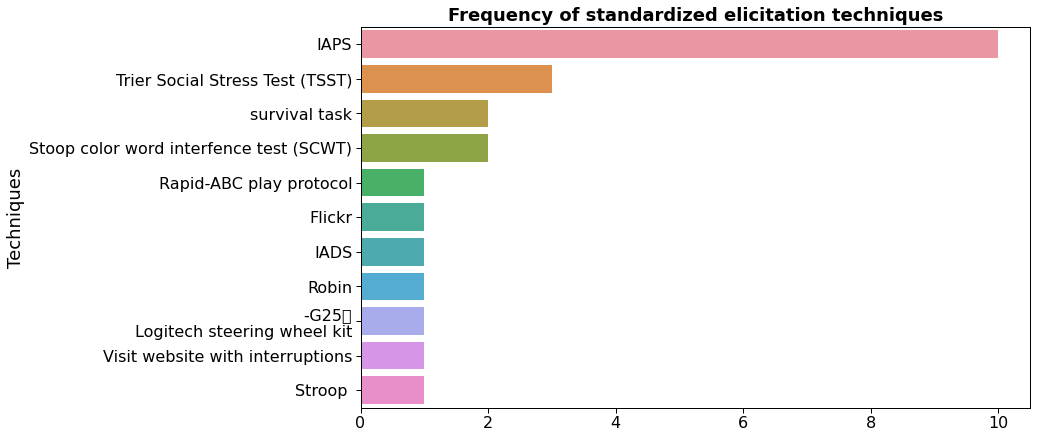

In [8]:
#Plot
plt.figure(figsize = (12,7))
sns.set_context('paper')
sns.countplot(y = 'technique_name',
            data = elicitation_techq,
            order = elicitation_techq['technique_name'].value_counts().index)
plt.title('Frequency of standardized elicitation techniques', fontweight = 'bold', fontsize = 18)
plt.xlabel('')
plt.ylabel('Techniques', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

#### Task ACTIVE or PASSIVE

In [9]:
type_task = data_elicitation.groupby(['paper_id', 'task_type_active','task_type_pasive']).nth(0)
type_task.reset_index(inplace= True)

¿CUANTOS MODELOS SIN ACLARAR TASK ACTIVE OR PASSIVE?

In [10]:
len(type_task[(type_task['task_type_active'] == '-') &
            (type_task['task_type_pasive'] == '-')])

7

In [11]:
#### Task ACTIVE or PASSIVE
task_type = multi_reversing(type_task, 'model_id', type_task[['task_type_active','task_type_pasive']])
task_type['variable'].value_counts()


task_type_pasive    76
task_type_active    22
Name: variable, dtype: int64

In [12]:
task_type['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

task_type_pasive    77.6%
task_type_active    22.4%
Name: variable, dtype: object

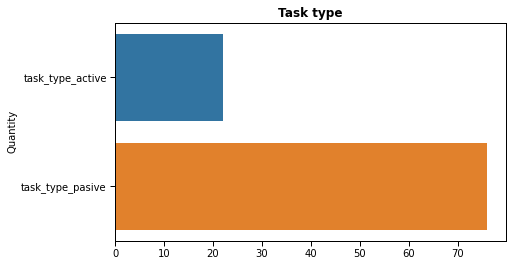

In [13]:
#Plot
plt.figure(figsize = (7,4))
sns.countplot(y = 'variable',
            data = task_type)
plt.title('Task type', fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Quantity', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### FRECUENCY BY MODALITY

##### Frecuency by multimodal, visual or auditory( si la modalidad era activa no se marcó ninguna de los 3)

In [14]:
freq_modality = data_elicitation.groupby(['paper_id','is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']).nth(0)
freq_modality.reset_index(inplace=True)

In [15]:
df_modality = multi_reversing(freq_modality, 'model_id', freq_modality[['is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']])
df_modality['variable'].value_counts()

is_multimodal        54
modality_visual      19
modality_auditory    10
Name: variable, dtype: int64

In [16]:
number_modality = sum(df_modality['variable'].value_counts())
print (f'Se hallaron {number_modality} instancias en total entre multimodal, visual, auditory y somatosensory.')

Se hallaron 83 instancias en total entre multimodal, visual, auditory y somatosensory.


In [17]:
df_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

is_multimodal        65.1%
modality_visual      22.9%
modality_auditory    12.0%
Name: variable, dtype: object

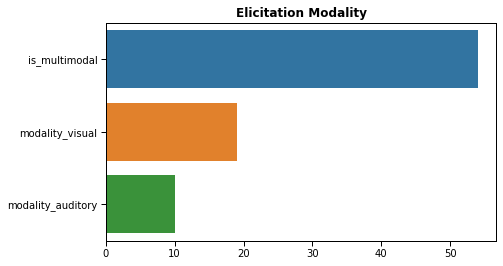

In [18]:
#Plot
plt.figure(figsize = (7,4))
sns.set_context('paper')
sns.countplot(y = 'variable',
            data = df_modality)
plt.title('Elicitation Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

SI queremos distinguir a aquellas modalidades multi donde se usan VIDEOCLIPS es decir VIDEOS + MUSICA entonces...
¿Cúantos usaron videoclips?

ATENCION: EN ESTE FALTARÍAN ALGUNAS MODIFICACIONES EN LA TABLA PARA QUE SEA EXACTO. YO CUANDO UN PAPER USABA VIDEOCLIPS MARCABA X EN VISUAL_VIDEOS Y A LA VEZ X EN AUDITORY_MIUSIC. PERO NO TODOS LO HICIERON ASÍ. ASI QUE EN CASO DE QUE SE DECIDA USAR ESTO HABRIA QUE MODIFICAR EL RESTO

In [19]:
videoclips = freq_modality[(freq_modality['visual_videos'] == 'x') & (freq_modality['auditory_miusic'] == 'x')]
len(videoclips)

16

#### By visual modality (pictures, videos, words, other)

In [20]:
visual_type = data_elicitation.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other']).nth(0)
##Acá se podría crear otra columna que sea "both visual and auditory"
visual_type.reset_index(inplace=True)

In [21]:
df_visual_modality = multi_reversing(visual_type, 'model_id', visual_type.loc[:,'visual_pictures':'visual_other'])
df_visual_modality['variable'].value_counts()

visual_videos      57
visual_pictures    16
visual_words        2
Name: variable, dtype: int64

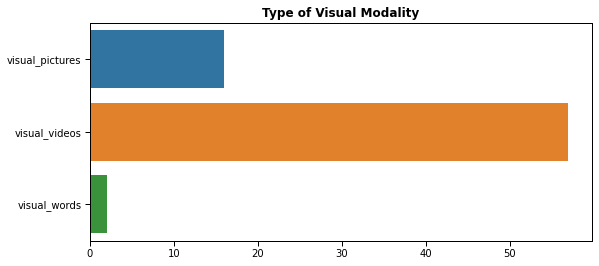

In [22]:
#Plot
plt.figure(figsize = (9,4))
sns.countplot(y = 'variable',
            data = df_visual_modality)
plt.title('Type of Visual Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### Frecuencia desde driving a puzzle

In [23]:
freq_from_driving = data_elicitation.groupby(['paper_id','technique_clasif_driving','technique_clasif_Imagination techniques /memory recall',
    'technique_clasif_Social interactions', 'technique_clasif_Virtual Reality', 'technique_clasif_Meditation', 
    'technique_clasif_Reading', 'technique_clasif_Ux', 'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
     'technique_clasif_Videogame', 'technique_clasif_Puzzle']).nth(0)

In [24]:
freq_from_driving.reset_index(inplace=True)

In [25]:
other_classification_tech = multi_reversing(freq_from_driving, 'model_id',freq_from_driving.loc[:, 'technique_clasif_driving':'technique_clasif_Puzzle'])

In [26]:
other_classification_tech['variable'].value_counts()

technique_clasif_driving                                    4
technique_clasif_Social interactions                        4
technique_clasif_Meditation                                 2
technique_clasif_Virtual Reality                            1
technique_clasif_Reading                                    1
technique_clasif_Ux                                         1
technique_clasif_TEM clips (Tactile Enhanced Multimedia)    1
technique_clasif_Videogame                                  1
Name: variable, dtype: int64

In [27]:
other_classification_tech['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

technique_clasif_driving                                    26.7%
technique_clasif_Social interactions                        26.7%
technique_clasif_Meditation                                 13.3%
technique_clasif_Virtual Reality                             6.7%
technique_clasif_Reading                                     6.7%
technique_clasif_Ux                                          6.7%
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     6.7%
technique_clasif_Videogame                                   6.7%
Name: variable, dtype: object

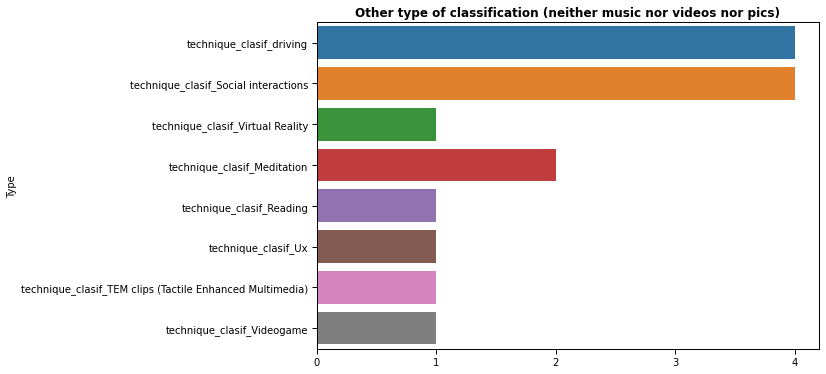

In [28]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(y = 'variable',
            data = other_classification_tech)
plt.title('Other type of classification (neither music nor videos nor pics)',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Type', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(ticks = range(0,5),fontsize = 10)
plt.show()

PLOT ALL MODALITYS
UNION ELICITATION MODALITY Y DRIVING-PUZZLE

In [29]:
freq_modality_all = data_elicitation.groupby(['paper_id','is_multimodal','modality_visual','modality_auditory',
    'modality_somatosensory','technique_clasif_driving','technique_clasif_Imagination techniques /memory recall',
    'technique_clasif_Social interactions', 'technique_clasif_Virtual Reality', 'technique_clasif_Meditation', 
    'technique_clasif_Reading', 'technique_clasif_Ux', 'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
    'technique_clasif_Videogame', 'technique_clasif_Puzzle']).nth(0)
freq_modality_all.reset_index(inplace=True)

¿En cuantos no tenemos data?

In [30]:
len(freq_modality_all[(freq_modality_all['is_multimodal'] == '-') &
            (freq_modality_all['modality_visual'] == '-') &
            (freq_modality_all['modality_auditory'] == '-') &
            (freq_modality_all['modality_somatosensory'] == '-') &
            (freq_modality_all['technique_clasif_driving'] == '-') &
            (freq_modality_all['technique_clasif_Imagination techniques /memory recall'] == '-') &
            (freq_modality_all['technique_clasif_Social interactions'] == '-') &
            (freq_modality_all['technique_clasif_Virtual Reality'] == '-') &
            (freq_modality_all['technique_clasif_Meditation'] == '-') &
            (freq_modality_all['technique_clasif_Videogame'] == '-') &
            (freq_modality_all['technique_clasif_Puzzle'] == '-')
            
            
            ])

19

In [31]:
freq_modality_all = data_elicitation.groupby(['paper_id','is_multimodal','modality_visual','modality_auditory',
    'modality_somatosensory','technique_clasif_driving','technique_clasif_Imagination techniques /memory recall',
    'technique_clasif_Social interactions', 'technique_clasif_Virtual Reality', 'technique_clasif_Meditation', 
    'technique_clasif_Reading', 'technique_clasif_Ux', 'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
    'technique_clasif_Videogame', 'technique_clasif_Puzzle']).nth(0)
freq_modality_all.reset_index(inplace=True)

In [32]:
df_modality_all = multi_reversing(freq_modality_all, 'model_id', freq_modality_all[['is_multimodal','modality_visual','modality_auditory',
    'modality_somatosensory','technique_clasif_driving','technique_clasif_Imagination techniques /memory recall',
    'technique_clasif_Social interactions', 'technique_clasif_Virtual Reality', 'technique_clasif_Meditation', 
    'technique_clasif_Reading', 'technique_clasif_Ux', 'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
    'technique_clasif_Videogame', 'technique_clasif_Puzzle']])
df_modality_all['variable'].value_counts()

is_multimodal                                               55
modality_visual                                             19
modality_auditory                                           10
technique_clasif_driving                                     4
technique_clasif_Social interactions                         4
technique_clasif_Meditation                                  2
technique_clasif_Virtual Reality                             1
technique_clasif_Reading                                     1
technique_clasif_Ux                                          1
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     1
technique_clasif_Videogame                                   1
Name: variable, dtype: int64

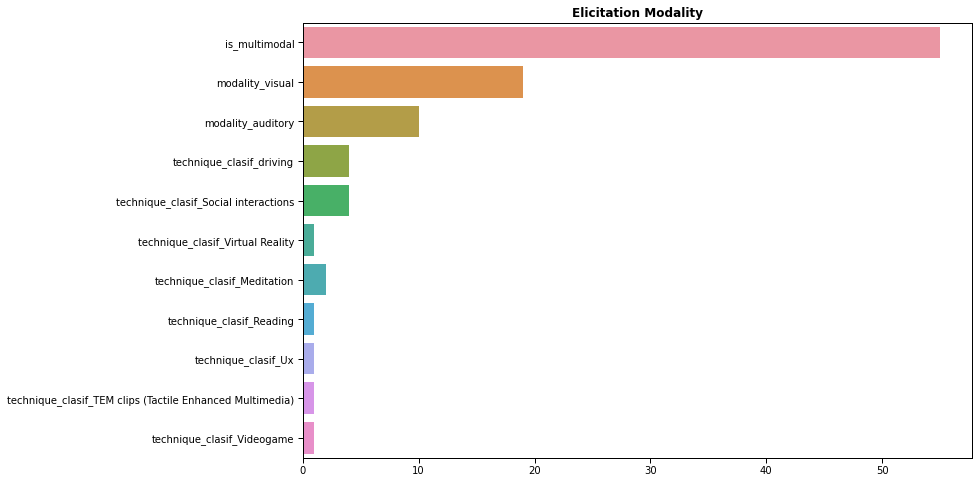

In [33]:
#Plot
plt.figure(figsize = (12,8))
sns.set_context('paper')
sns.countplot(y = 'variable',
            data = df_modality_all)
plt.title('Elicitation Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### EDA

In [34]:
#Import data
df_eda = pd.read_csv('../update_data/Tabla Normalizada - EDA.csv')
df_eda = df_eda.fillna('-')
eda_devices = df_eda[df_eda['eda_device_specification']!= '-']  #me quedo solo con las rows que usaron dispositivos

¿En cuantas ocasiones no aclara el dispositivo de EDA utilizado?

In [35]:
aver = df_eda.groupby(['paper_id', 'eda_device_specification']).nth(0)
aver.reset_index(inplace= True)
len(aver[aver['eda_device_specification'] == '-'])

13

¿Cuantos eda devices HOMEMADE hay?

In [36]:
df_eda['eda_device_is_homemade']

0      Yes
1        x
2        -
3        -
4        -
      ... 
495      -
496      -
497      -
498      -
499      -
Name: eda_device_is_homemade, Length: 500, dtype: object

In [37]:
eda_devices = eda_devices.groupby(['paper_id', 'eda_device_specification']).nth(0)
eda_devices.reset_index(inplace=True)

In [38]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                           10
Biosemi activeTwo                            9
Shimmer 2R                                   8
Shimmer                                      3
Empatica E4                                  3
                                            ..
Shimmer3 GSR+ Unit sensor                    1
Nexus 4 Biofeedback system3                  1
Bodymedia                                    1
ProComp Infinity                             1
(BITalino (r)evolution Plugged\r\nKit BT     1
Name: eda_device_specification, Length: 61, dtype: int64

In [39]:
# REDUCIMOS LAS CATEGORÍAS AGRUPANDOLAS
main_categories = ['BIOPAC', 'Empatica','GSR2','Sociograph', 'Variport', 'Shimmer', 'BioRadio 150', 'Affectiva-QSensors5','ProComp Infinity','PowerLab', 'Grove']

def reduce_categories(list_categories):
    '''
    esta función toma una lista de categorias y reemplaza por ellas a las rows con categorías similares
    
    ej: reemplaza por BIOPAC a 'BIOPAC 150'

    '''
    for category in list_categories:
        for i in eda_devices.loc[:,'eda_device_specification']:
            if fuzz.ratio(category, i) > 45:
                eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace({i:category})

# Reducimos algunas categorías a partir de la funcion reduce_categories
reduce_categories(main_categories)

# Aún quedan algunas categorias sin unificar asi que unifico las restantes y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping_eda = {
    'MP150 Biopac': 'BIOPAC', 'MP35 Biopac' : 'BIOPAC','MP150':'BIOPAC','Biopac\r\nMP36' : 'BIOPAC',
    'Biosemi activeTwo' : 'Biosemi ActiveTwo', 'Biosemi ActiveTwo ':'Biosemi ActiveTwo',
    'PowerLab (manufactured\r\nby ADInstruments)': 'PowerLab',
    'Affectiva-QSensors5': 'Q Sensor by Afectiva',
    'Shimmer3 GSR+ Unit sensor':'Shimmer',
    'sensors produced by Thought Technology' : 'Thought Technology',
    'Grove\r\n(a standalone LM324 quadruple operational amplifier based on EDA sensor kit)':'Grove',
    'Grove GSR sensor produced by Seeed':'Grove',
    'Gen II integrated wearable device from Analog Devices, Inc': 'Gen II Analog Devices',
    'e-Health Sensor\nPlatform V2.0' : 'e-Health Sensor Platform V2.0',
    '(BITalino (r)evolution Plugged\r\nKit BT':'(BITalino (r)evolution Plugged Kit BT ',
    'Nexus-10' : 'NEXUS', 'Nexus 4 Biofeedback system3':'NEXUS', #NO ESTOY SEGURO SI ESTO REALMENTE SON LO MISMO, O SIQUIERA SI NEXUS ES LA MARCA
    'Nexus-32' : 'NEXUS'         }


eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace(mapping_eda)



In [40]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                               19
BIOPAC                                          17
Shimmer                                         16
Empatica                                         7
BioRadio 150                                     4
PowerLab                                         4
Grove                                            3
GSR2                                             3
NEXUS                                            3
ProComp Infinity                                 3
Q Sensor by Afectiva                             3
Variport                                         2
Commercial bluetooth sensor                      2
Sociograph                                       2
Mindfield eSense                                 1
BioNeuro multichannel biofeedback instrument     1
Thought Technology                               1
e-Health Sensor Platform V2.0                    1
Bodymedia                                        1
LabVIEW                        

In [41]:
#In percentage
#Plot
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.2%
BIOPAC                                          17.2%
Shimmer                                         16.2%
Empatica                                         7.1%
BioRadio 150                                     4.0%
PowerLab                                         4.0%
Grove                                            3.0%
GSR2                                             3.0%
NEXUS                                            3.0%
ProComp Infinity                                 3.0%
Q Sensor by Afectiva                             3.0%
Variport                                         2.0%
Commercial bluetooth sensor                      2.0%
Sociograph                                       2.0%
Mindfield eSense                                 1.0%
BioNeuro multichannel biofeedback instrument     1.0%
Thought Technology                               1.0%
e-Health Sensor Platform V2.0                    1.0%
Bodymedia                   

¿Cuantos dipositivos de eda diferentes se utilizaron?

In [42]:
n_dispositivos_eda = eda_devices['eda_device_specification'].nunique()
print (f'Se utilizaron {n_dispositivos_eda} dispositivos de EDA diferentes')

Se utilizaron 25 dispositivos de EDA diferentes


¿En cuántas instancias de nuestro interés se especificó el dispositivo de EDA utilizado?

In [43]:
number_eda = sum(eda_devices['eda_device_specification'].value_counts())
print (f' Tenemos {number_eda} de instancias donde se aclaró el dispositivo de EDA utilizado.')

 Tenemos 99 de instancias donde se aclaró el dispositivo de EDA utilizado.


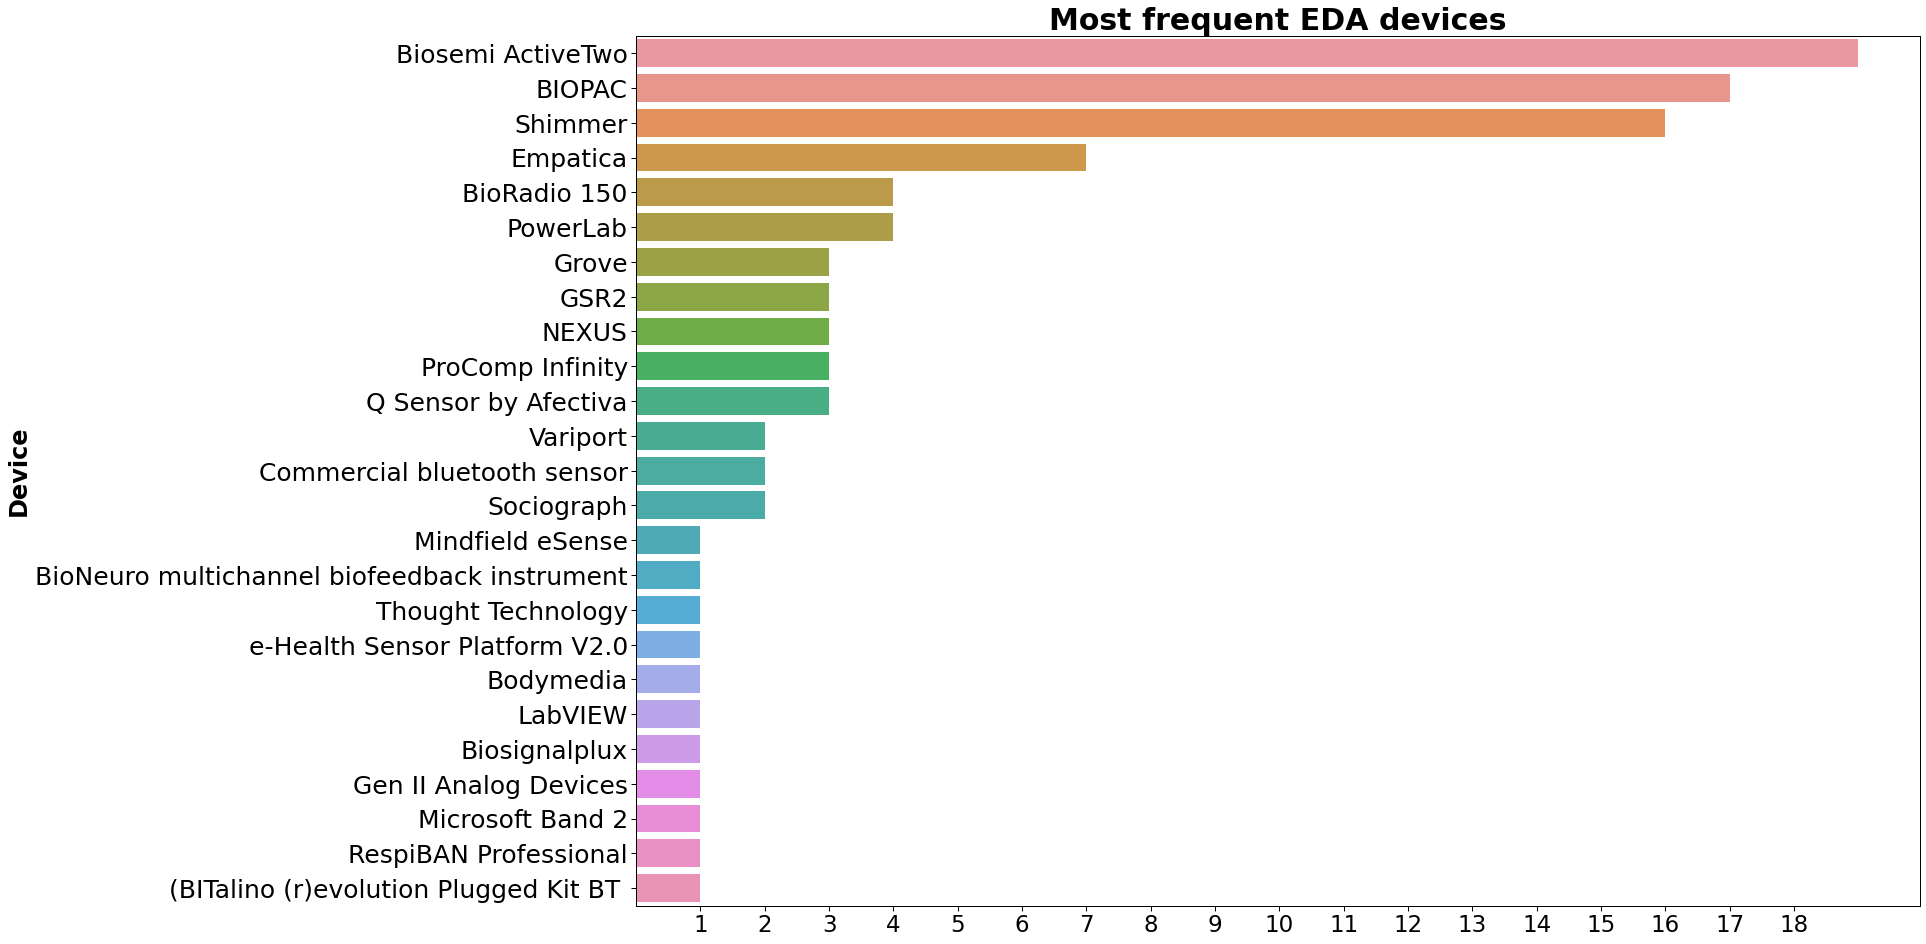

In [44]:
#Plot
from turtle import width


plt.figure(figsize = (23,16))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = eda_devices,
            order = eda_devices['eda_device_specification'].value_counts().index)
plt.title('Most frequent EDA devices',
            fontweight = 'bold',
            fontsize = 30)
plt.ylabel('Device',
            fontsize = 24,
            fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 25)
plt.xticks(ticks = range(1,19), fontsize = 23)
plt.show()

In [45]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        
        'Mindfield eSense': 'Others (<1)',
        'BioNeuro multichannel biofeedback instrument': 'Others (<1)',
        'Thought Technology': 'Others (<1)',
        'e-Health Sensor Platform V2.0': 'Others (<1)',
        'Bodymedia': 'Others (<1)',
        'LabVIEW': 'Others (<1)',
        'Biosignalplux': 'Others (<1)',
        'Gen II Analog Devices': 'Others (<1)',
        'Microsoft Band 2': 'Others (<1)',
        'RespiBAN Professional': 'Others (<1)',
        '(BITalino (r)evolution Plugged Kit BT ': 'Others (<1)'}

devices_with_others = eda_devices.copy()

devices_with_others.loc[:,'eda_device_specification'] = devices_with_others.loc[:,'eda_device_specification'].replace(mapping_others)
devices_with_others['eda_device_specification'].value_counts()


Biosemi ActiveTwo              19
BIOPAC                         17
Shimmer                        16
Others (<1)                    11
Empatica                        7
BioRadio 150                    4
PowerLab                        4
Q Sensor by Afectiva            3
Grove                           3
NEXUS                           3
ProComp Infinity                3
GSR2                            3
Sociograph                      2
Commercial bluetooth sensor     2
Variport                        2
Name: eda_device_specification, dtype: int64

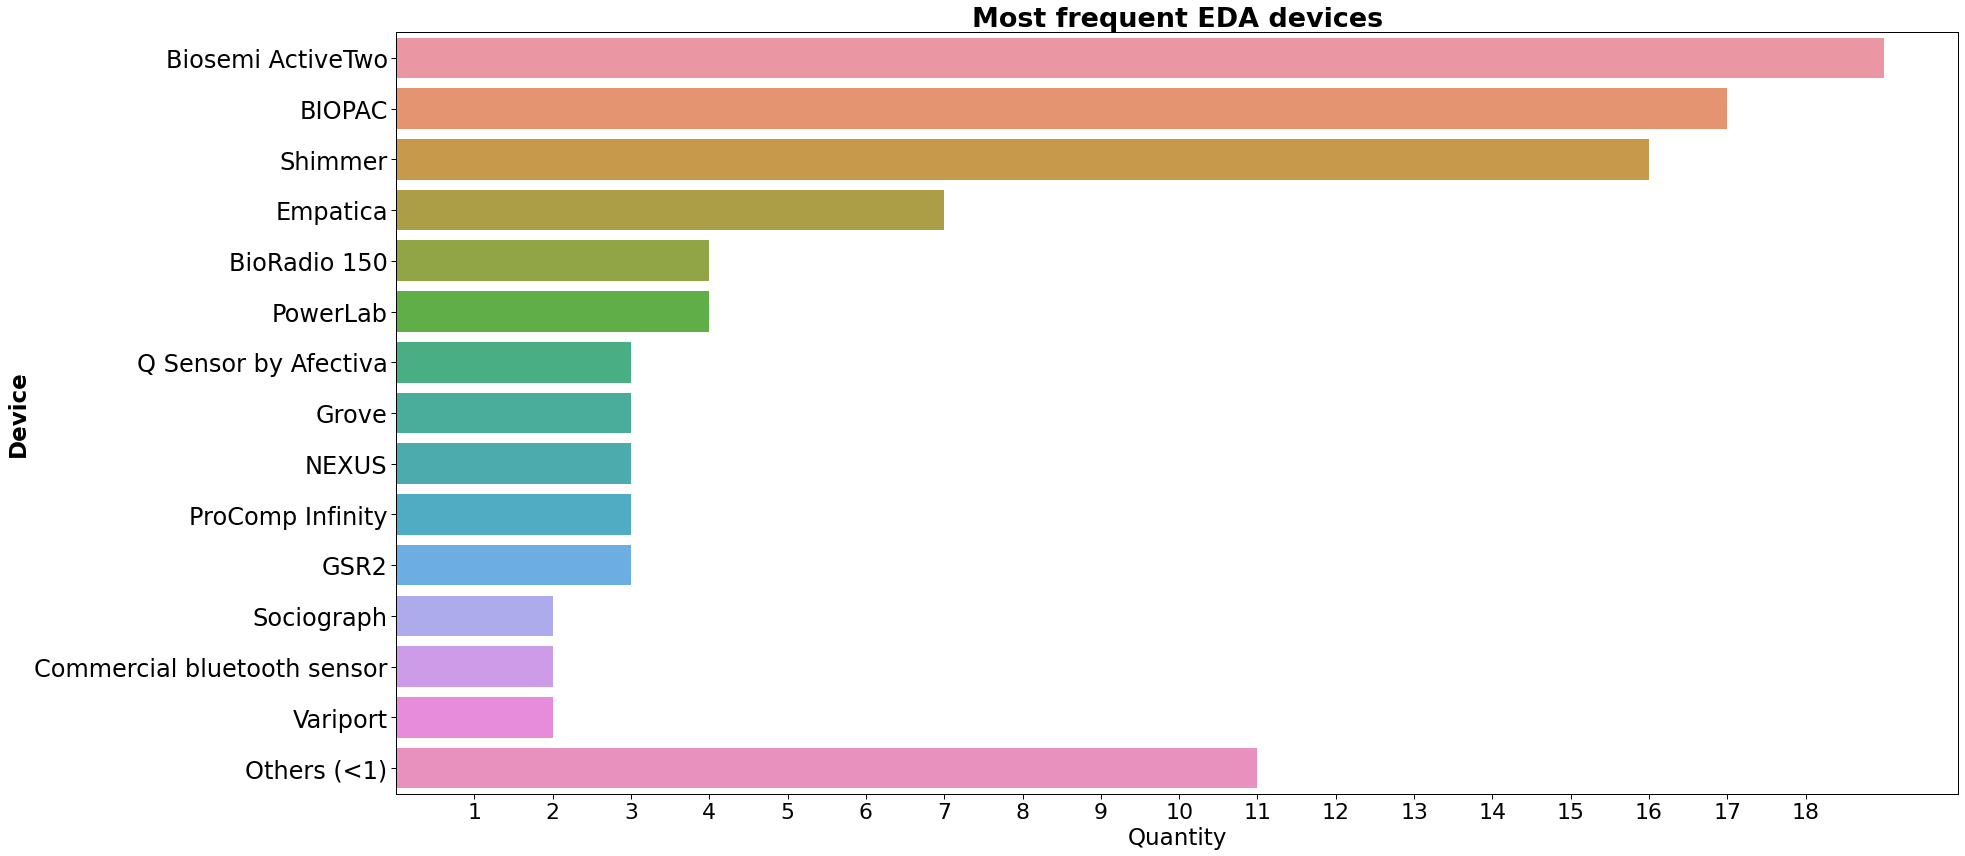

In [46]:
#Orden
plot_order = ['Biosemi ActiveTwo','BIOPAC', 'Shimmer', 'Empatica','BioRadio 150', 'PowerLab', 'Q Sensor by Afectiva' , 'Grove','NEXUS','ProComp Infinity', 'GSR2','Sociograph', 'Commercial bluetooth sensor', 'Variport', 'Others (<1)']

#Plot
plt.figure(figsize = (28,14))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = devices_with_others,
            order = plot_order)
plt.title('Most frequent EDA devices',
            fontweight = 'bold',
            fontsize = 27)
plt.ylabel('Device', fontsize = 23,fontweight = 'bold')
plt.xlabel('Quantity', fontsize = 23)
plt.yticks(fontsize = 24)
plt.xticks(ticks = range(1,19), fontsize = 22)
plt.show()

##### EDA LOCATION

- Primero comparar solo la columna is hands con el resto
- luego aclaro: de las que son hands como se distribuyen en los distintos dedos


In [47]:
#Import data
# df_eda = pd.read_csv('../update_data/Tabla Normalizada - EDA.csv', na_values=['-'])
# df_eda= df_eda.fillna('-')
df_eda['location_hemibody'] = df_eda['location_hemibody'].replace({'non-dominant': 'not dominant'})

# eda_hemibody = df_eda[df_eda['location_hemibody']!= '-'] 


In [48]:
hemibody = df_eda.groupby(['paper_id', 'location_hemibody']).nth(0)
hemibody.reset_index(inplace=True)
hemibody['location_hemibody'].value_counts()


-               66
left            23
not dominant    10
right            3
dominant         1
Name: location_hemibody, dtype: int64

In [49]:
sum(hemibody['location_hemibody'].value_counts()
)

103

En 66 ocasiones no aclara el hemibody

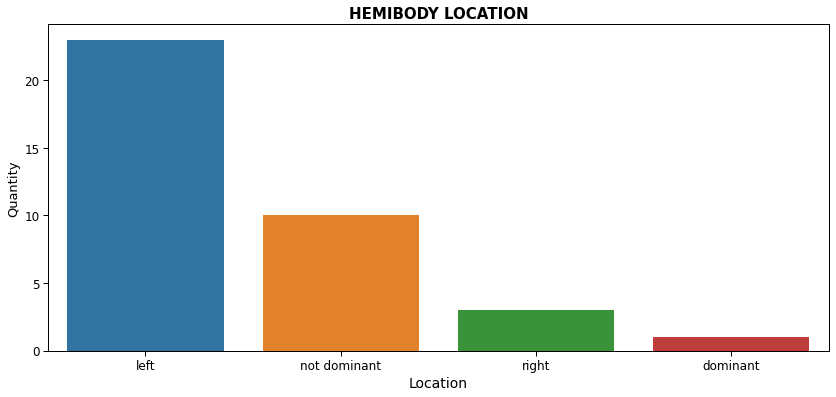

In [50]:
#Orden
plot_order = ['left', 'not dominant', 'right', 'dominant']
#Plot
plt.figure(figsize = (14,6))
sns.set_context('paper')
sns.countplot(x = 'location_hemibody',
            data = hemibody,
            order = plot_order)
plt.title('HEMIBODY LOCATION',
            fontweight = 'bold',
            fontsize = 15)
plt.xlabel('Location',
            fontsize = 14)
plt.ylabel('Quantity', fontsize =13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [51]:
sensors = df_eda.groupby(['paper_id','is_hands','wrist', 'chest', 'left_lobe_temporalis',
                    'finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring','finger_small', 'finger_little',
                     'phalange_proximal', 'phalange_medial','phalange_distal',
                     ]).nth(0)
sensors.reset_index(inplace= True)

In [52]:
sensors_location = df_eda.groupby(['paper_id','is_hands','wrist', 'chest', 'left_lobe_temporalis']).nth(0)
sensors_location.reset_index(inplace = True)

PAPERS WITH NO DATA RELATED TO SENSORS LOCATION

In [53]:
len(sensors[(sensors['is_hands'] == '-') &
            (sensors['wrist'] == '-') &
            (sensors['chest'] == '-') &
            (sensors['left_lobe_temporalis'] == '-')])

28

In [54]:
general_place = multi_reversing(sensors, 'model_id',sensors[['is_hands','wrist', 'chest', 'left_lobe_temporalis']])
general_place['variable'].value_counts()

is_hands    68
wrist       13
chest        1
Name: variable, dtype: int64

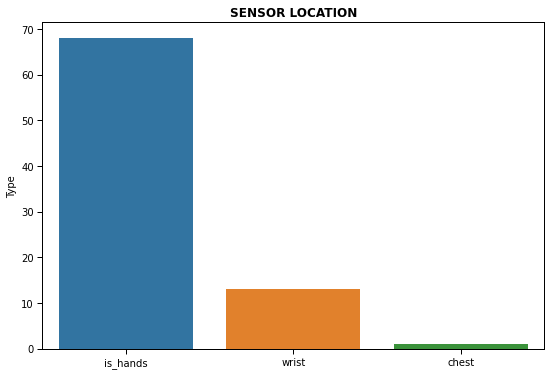

In [55]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(x = 'variable',
            data = general_place)
plt.title('SENSOR LOCATION',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Type', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [56]:
finger_sensor = multi_reversing(sensors, 'model_id',sensors[['finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring','finger_small', 'finger_little']])
finger_sensor['variable'].value_counts()

finger_mIddle    52
finger_index     43
finger_ring      22
finger_thumb      1
finger_small      1
finger_little     1
Name: variable, dtype: int64

In [57]:
finger_sensor = multi_reversing(sensors, 'model_id',sensors[['finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring','finger_small', 'finger_little']])
finger_sensor['variable'].value_counts()

finger_mIddle    52
finger_index     43
finger_ring      22
finger_thumb      1
finger_small      1
finger_little     1
Name: variable, dtype: int64

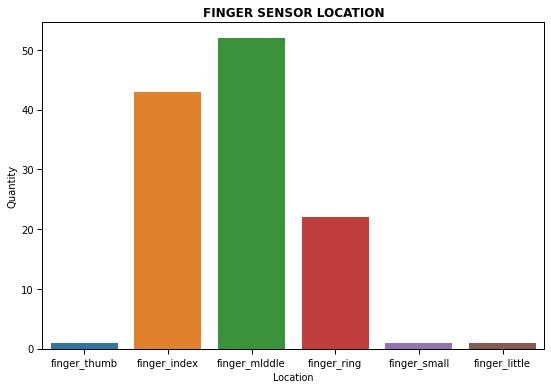

In [58]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(x = 'variable',
            data = finger_sensor)
plt.title('FINGER SENSOR LOCATION',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Quantity', fontsize = 10)
plt.xlabel('Location')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [59]:
location_phalanges = multi_reversing(sensors, 'model_id',sensors[['phalange_proximal', 'phalange_medial','phalange_distal']])
location_phalanges['variable'].value_counts()

phalange_distal      21
phalange_medial      11
phalange_proximal     2
Name: variable, dtype: int64

#### EMOTIONAL MODEL

In [60]:
df_statistical_learning_models = pd.read_csv('../update_data/Tabla Normalizada - Statistical Learning model.csv')
df_statistical_learning_models=df_statistical_learning_models.fillna('-')

In [61]:
stats_and_affective_model = df_statistical_learning_models.groupby(['paper_id', 'affective_model']).nth(0)
stats_and_affective_model.reset_index(inplace=True)
stats_and_affective_model['affective_model'].value_counts()

dimensional    68
categorical    40
-               1
Name: affective_model, dtype: int64

In [62]:
stats_and_affective_model['affective_model'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

dimensional    62.4%
categorical    36.7%
-               0.9%
Name: affective_model, dtype: object

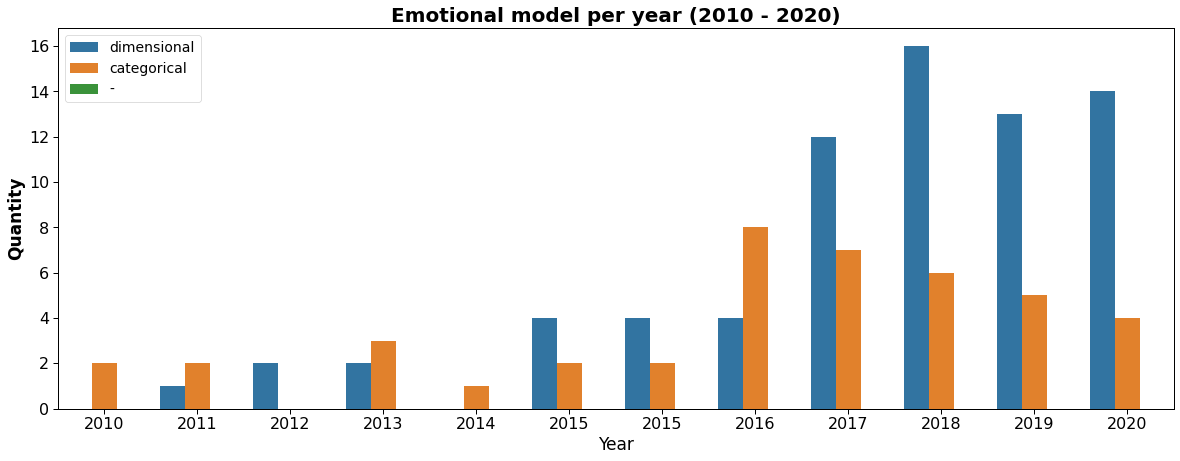

In [63]:
#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
plt.figure(figsize = (20,7))
sns.countplot(x='year', 
    data= stats_and_affective_model, 
    hue='affective_model', 
    order=category_order)
plt.title('Emotional model per year (2010 - 2020)',
            fontweight = 'bold',
            fontsize = 20)
plt.ylabel('Quantity', fontsize = 17,fontweight = 'bold')
plt.xlabel('Year', fontsize = 17)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend (fontsize = 14)
plt.show()

FRECUENCIA DE BASES DE DATOS PUBLICA O PRIVADA (DATOS PROPIOS)

Indaga si se usaron datos propios o se recurrieron a datos de 3ros para entrenar los modelos

In [64]:
data_type = pd.read_csv ('../update_data/Tabla Normalizada - Data type.csv')
data_type = data_type.fillna('-')
data_base = data_type.groupby(['paper_id', 'is_database']).nth(0)
data_base.reset_index(inplace=True)


Por modelo

In [65]:
#Modifico los valores de la columna db_type
data_type['is_database'] = data_type['is_database'].replace ({'-': 'No', 'x': 'Yes', 'X' : 'Yes'})
data_type['is_database'].value_counts()

No     300
Yes    200
Name: is_database, dtype: int64

In [66]:
data_base

,paper_id,is_database,model_id,apa_citation,year,db_access,public_database,use_multiple_db,db_private,db_public,...,SenseEmotion,PMEmo,AFEW,Hazumi1911,Bio Vid Emo DB,RCDAT,DREAMER,Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status,Stress Recognition in Automobile Drivers Data Set,PsPM-HRA1
0,1,-,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",2017,restricted,-,-,x,-,...,-,-,-,-,-,-,-,-,-,-
1,2,-,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",2016,restricted,-,-,x,-,...,-,-,-,-,-,-,-,-,-,-
2,3,x,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",2018,open,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,4,x,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",2018,open,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,5,-,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016,restricted,-,-,x,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,x,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",2020,open,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
97,97,-,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",2020,restricted,-,-,x,-,...,-,-,-,-,-,-,-,-,-,-
98,98,x,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,open,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
99,99,x,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",2018,open,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [67]:
#Modifico los valores de la columna db_type
data_base['is_database'] = data_base['is_database'].replace ({'-': 'No', 'x': 'Yes', 'X' : 'Yes'})
data_base['is_database'].value_counts()

No     64
Yes    37
Name: is_database, dtype: int64

In [68]:
data_base['is_database'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No     63.4%
Yes    36.6%
Name: is_database, dtype: object

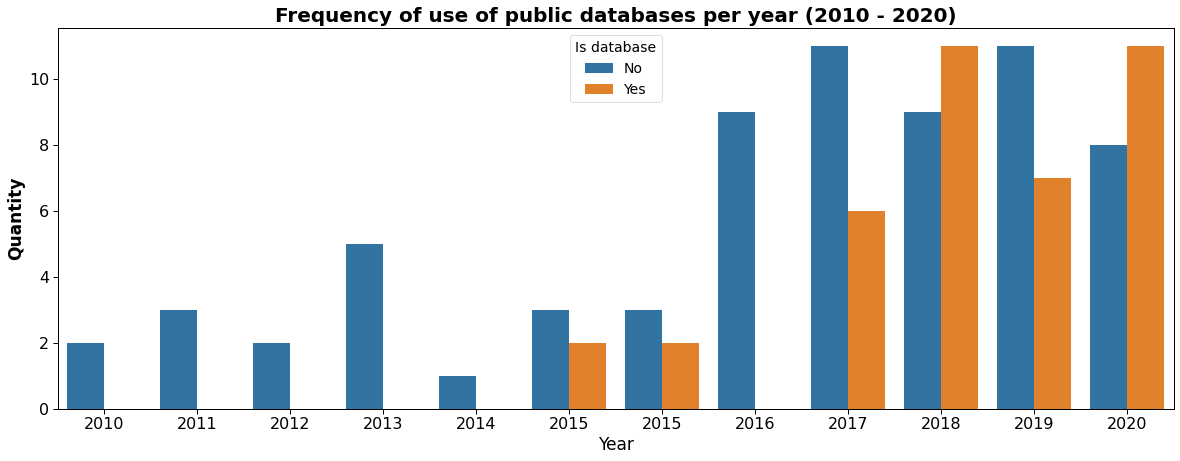

In [69]:
plt.figure(figsize = (20,7))
sns.set_context('paper')
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
sns.countplot(x='year', 
    data= data_base, 
    hue='is_database', 
    order=category_order)

plt.title('Frequency of use of public databases per year (2010 - 2020)',
            fontweight = 'bold',
            fontsize =20)
plt.ylabel('Quantity', fontsize = 17,fontweight = 'bold')
plt.xlabel('Year', fontsize = 17)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend (title= 'Is database',title_fontsize = 14,fontsize = 14)
plt.show()

ACCESO A LOS DATOS
EL SCRIPT SIGUIENTE ES SOBRE EL ACCESO A LOS DATOS. Es decir por un lado tenemos a aquellos datos que podemos acceder libremente (ya sean bases de datos de 3ros o datos originales) y por otro aquellos que el acceso es restringido

In [70]:
data_type = pd.read_csv ('../update_data/Tabla Normalizada - Data type.csv')
data_type = data_type.fillna('-')
data_base = data_type.groupby(['paper_id', 'db_access']).nth(0)
data_base.reset_index(inplace=True)


In [71]:
#Modifico los valores de la columna db_type

data_base['db_access'].value_counts()

restricted    59
open          42
Name: db_access, dtype: int64

In [72]:
data_base['db_access'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

restricted    58.4%
open          41.6%
Name: db_access, dtype: object

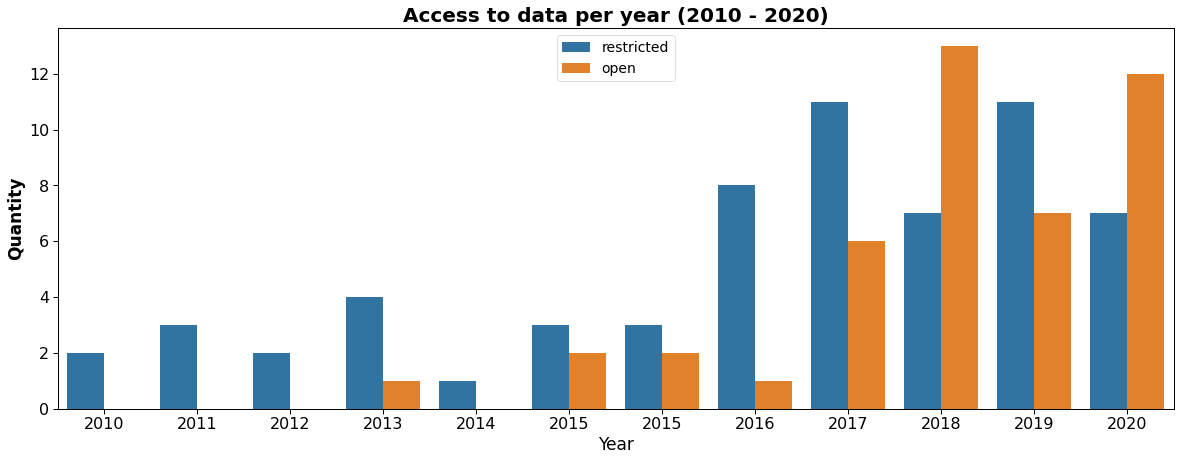

In [73]:

plt.figure(figsize = (20,7))
sns.set_context('paper')
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
sns.countplot(x='year', 
    data= data_base, 
    hue='db_access', 
    order=category_order)

plt.title('Access to data per year (2010 - 2020)',
            fontweight = 'bold',
            fontsize =20)
plt.ylabel('Quantity', fontsize = 17,fontweight = 'bold')
plt.xlabel('Year', fontsize = 17)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend (fontsize = 14)
plt.show()

In [74]:
freq_data_base = data_type.groupby(['paper_id','DEAP', 'AMIGOS', 'MAHNOB', 'CASE',
       'Ascertain', 'Cog.load', 'Multimodal Dyadic Behavior (MMDB)', 'RECOLA',
       'DECAF', 'Driving Workload', '(AV+EC) 2015', 'Liris', 'SenseEmotion',
       'PMEmo', 'AFEW', 'Hazumi1911', 'Bio Vid Emo DB', 'RCDAT', 'DREAMER']).nth(0)
freq_data_base.reset_index(inplace=True)


db_freq = multi_reversing(freq_data_base, 'model_id', freq_data_base[['DEAP', 'AMIGOS', 'MAHNOB', 'CASE',
       'Ascertain', 'Cog.load', 'Multimodal Dyadic Behavior (MMDB)', 'RECOLA',
       'DECAF', 'Driving Workload', '(AV+EC) 2015', 'Liris', 'SenseEmotion',
       'PMEmo', 'AFEW', 'Hazumi1911', 'Bio Vid Emo DB', 'RCDAT', 'DREAMER']])
db_freq['variable'].value_counts()

DEAP                                 10
MAHNOB                                9
AMIGOS                                8
PMEmo                                 3
Ascertain                             2
RECOLA                                2
Cog.load                              1
Multimodal Dyadic Behavior (MMDB)     1
Driving Workload                      1
(AV+EC) 2015                          1
Liris                                 1
AFEW                                  1
Hazumi1911                            1
Bio Vid Emo DB                        1
RCDAT                                 1
Name: variable, dtype: int64

¿En cuantas ocasiones se recurrió a bases de datos?

In [75]:
number_db= sum(db_freq['variable'].value_counts())
print (f'Se utilizaron bases de datos en {number_db} instancias de nuestro interés.')

Se utilizaron bases de datos en 43 instancias de nuestro interés.


In [76]:
db_freq['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

DEAP                                 23.3%
MAHNOB                               20.9%
AMIGOS                               18.6%
PMEmo                                 7.0%
Ascertain                             4.7%
RECOLA                                4.7%
Cog.load                              2.3%
Multimodal Dyadic Behavior (MMDB)     2.3%
Driving Workload                      2.3%
(AV+EC) 2015                          2.3%
Liris                                 2.3%
AFEW                                  2.3%
Hazumi1911                            2.3%
Bio Vid Emo DB                        2.3%
RCDAT                                 2.3%
Name: variable, dtype: object

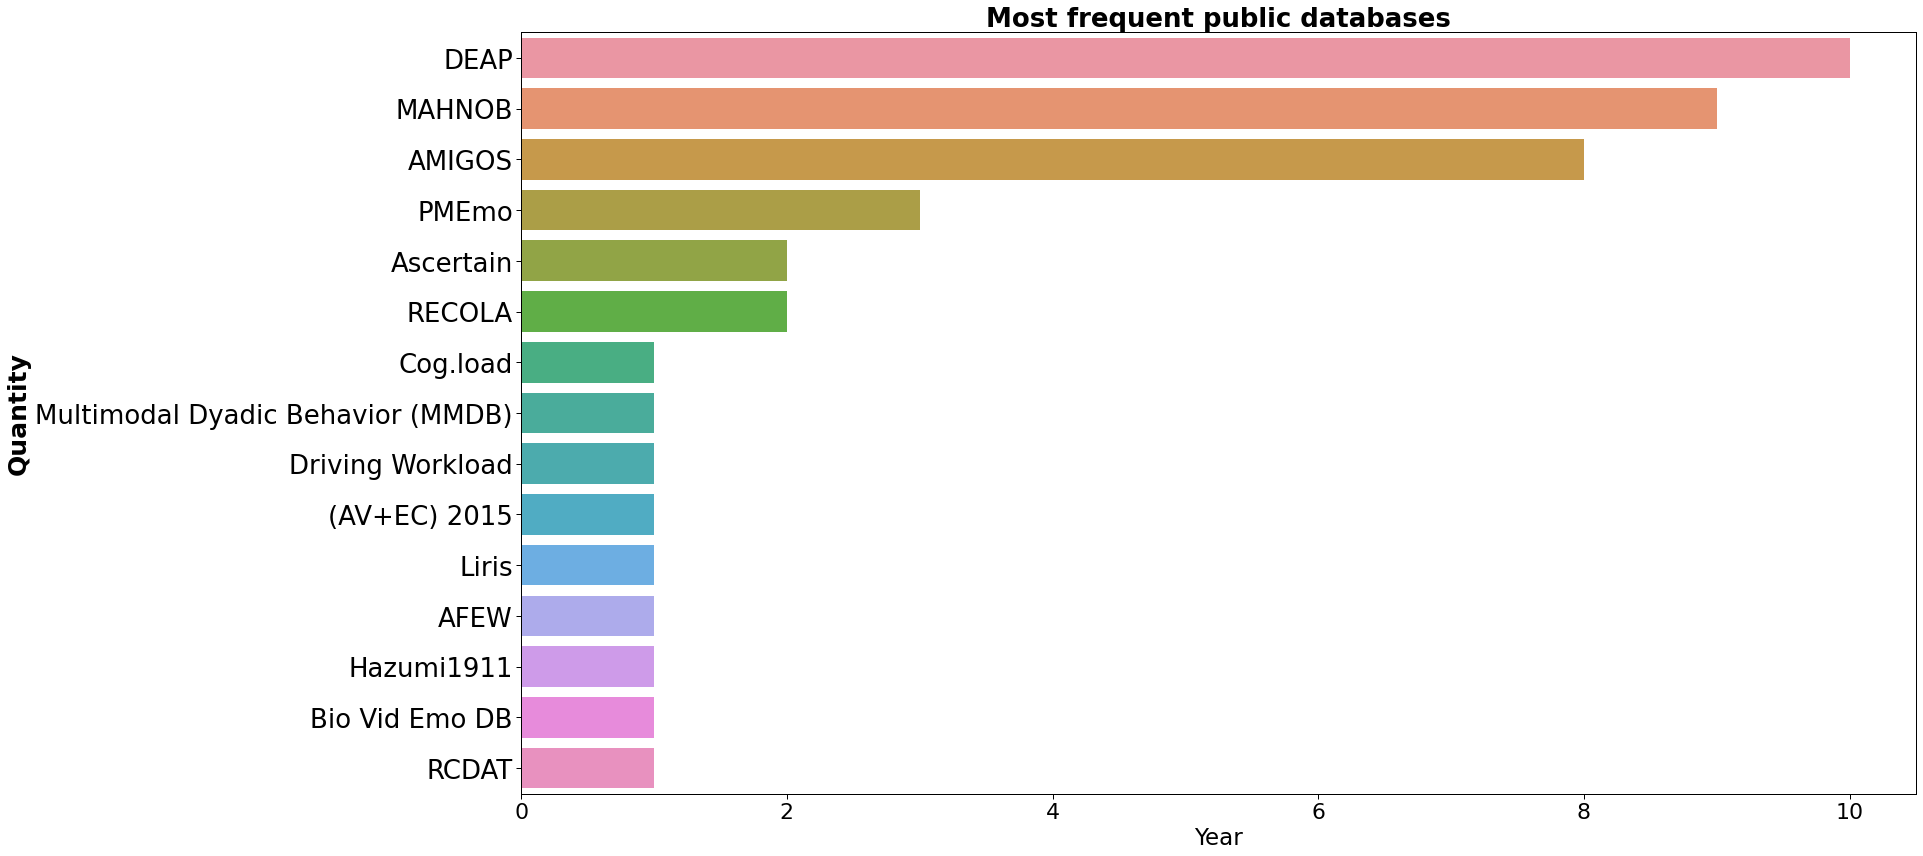

In [77]:

plt.figure(figsize = (25,14))
sns.set_context('paper')
sns.countplot(y='variable',
            data=db_freq,
            order = db_freq.variable.value_counts().index)

plt.title('Most frequent public databases',
            fontweight = 'bold',
            fontsize =26)
plt.ylabel('Quantity', fontsize = 25,fontweight = 'bold')
plt.xlabel('Year', fontsize = 23)
plt.yticks(fontsize = 26)
plt.xticks(fontsize = 22)
plt.show()

MODEL INTERPRETATION

In [78]:
data_interpretation_model = pd.read_csv('../update_data/Tabla Normalizada - Statistical Learning model.csv')
data_interpretation_model= data_interpretation_model.fillna('-')

In [79]:
model_interpretion = data_interpretation_model[data_interpretation_model['model_interpretation'] !='-']


In [80]:
model_interpretation = model_interpretion.groupby(['paper_id', 'model_interpretation']).nth(0)

In [81]:
model_interpretation.reset_index(inplace= True)
model_interpretation.drop_duplicates(subset = ['paper_id'],inplace=True)
model_interpretation


,paper_id,model_interpretation,model_id,apa_citation,year,affective_model,is_classifier,class_model_output_number,class_model_output_categories,class_Logistic Regression,...,regre_Convolutional NN,regre_Recurrent NN,regre_LSTM,regre_PNN (probabilistic neural network),model_level_intersubject,model_level_intrasubject,n_model_input,is_physiologicall_interpretation,is_public_code,public_code_location
0,5.0,"By using the gradient fields (see Fig. 6(c,d))...",10.0,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016.0,dimensional,-,-,-,-,...,-,-,-,-,-,-,-,x,-,-
1,12.0,Figure 6 shows similar EDA signal behaviour du...,47.0,"Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...",2018.0,categorical,x,2,"neutral, stress",-,...,-,-,-,-,x,-,-,x,-,-
2,17.0,"After preprocessing and windowing the signals,...",95.0,"Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...",2017.0,categorical,x,2,"happiness, rest",-,...,-,-,-,-,x,-,-,x,-,-
3,19.0,The relationship between visual descriptors an...,129.0,"Hernández-García, A., Fernández-Martínez, F., ...",2017.0,dimensional,-,-,-,-,...,-,-,-,-,?,?,-,x,-,-
4,21.0,Physiological measures in the real world are m...,132.0,"Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...",2017.0,dimensional,x,5,"HAHV, HALV, LAHV, LALV, neutral",-,...,-,-,-,-,-,-,-,x,-,-
5,29.0,"Furthermore, it is worth noting that quality a...",167.0,"Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...",2016.0,dimensional,x,2,"LA, HA",-,...,-,-,-,-,x,-,-,x,-,-
6,30.0,Poor classification accuracy may arise because...,175.0,"Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...",2016.0,categorical,x,2,"stress, anger",-,...,-,-,-,-,x,-,-,x,-,-
8,35.0,"Compare to some references [1], [3], [4], the ...",195.0,"Ferdinando, H., & Alasaarela, E. (2018). Emoti...",2018.0,dimensional,x,3,"calm, medium aroused, excited",-,...,-,-,-,-,x,-,-,x,-,-
9,43.0,"Electrodermal Activity. Interestingly, EDA se...",261.0,"Barral, O., Kosunen, I., & Jacucci, G. (2017)....",2017.0,categorical,x,2,"funny, not funny",-,...,-,-,-,-,-,-,-,x,-,-
10,58.0,"Additionally, we showed that psychological tra...",296.0,"Henriques, R., Paiva, A., & Antunes, C. (2013)...",2013.0,categorical,x,5,"empathy, expectation, positive-surprise, stres...",-,...,-,-,-,-,-,-,-,x,-,-


In [82]:
print(f' En {len(model_interpretation)} papers se realizan interpretaciones emocionales de los modelos')

 En 23 papers se realizan interpretaciones emocionales de los modelos


#### Participants

In [83]:
data_participants = pd.read_csv('../update_data/Tabla Normalizada - Participants.csv')
data_participants= data_participants.fillna('-')

In [84]:
participants_total = data_participants.groupby(['paper_id', 'N']).nth(0)
participants_total.reset_index(inplace =  True)


,paper_id,N,model_id,apa_citation,n_female,mean_age,meadian_age,range_age,country
0,1,45,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",20,-,-,-,Spain
1,2,-,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",-,-,-,-,China
2,3,32,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",16,26.9,-,19-37,-
3,4,27,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",16,26.06,-,19-40,-
4,5,27,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,19.44,-,18-22,-
...,...,...,...,...,...,...,...,...,...
103,96,40,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",13,28.3,-,-,-
104,97,22,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",-,20,-,-,Poland
105,98,32,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",16,26.9,-,19-37,-
106,99,58,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",21,30,-,-,-


In [85]:
participants_n= participants_total[participants_total['N']!= '-']
participants_n

,paper_id,N,model_id,apa_citation,n_female,mean_age,meadian_age,range_age,country
0,1,45,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",20,-,-,-,Spain
2,3,32,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",16,26.9,-,19-37,-
3,4,27,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",16,26.06,-,19-40,-
4,5,27,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,19.44,-,18-22,-
5,6,121,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",-,-,-,1-3,USA
...,...,...,...,...,...,...,...,...,...
103,96,40,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",13,28.3,-,-,-
104,97,22,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",-,20,-,-,Poland
105,98,32,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",16,26.9,-,19-37,-
106,99,58,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",21,30,-,-,-


In [86]:
participants_n['N'] = participants_n['N'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 107
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   paper_id      97 non-null     int64 
 1   N             97 non-null     int32 
 2   model_id      97 non-null     int64 
 3   apa_citation  97 non-null     object
 4   n_female      97 non-null     object
 5   mean_age      97 non-null     object
 6   meadian_age   97 non-null     object
 7   range_age     97 non-null     object
 8   country       97 non-null     object
dtypes: int32(1), int64(2), object(6)
memory usage: 7.2+ KB


C:\Users\agust\AppData\Local\Temp/ipykernel_32132/3831258821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants_n['N'] = participants_n['N'].astype('int')


<AxesSubplot:>

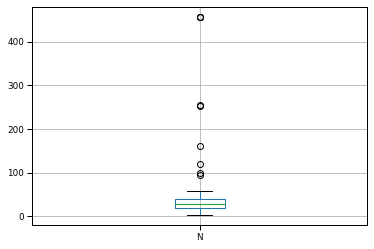

In [87]:
participants_n.boxplot(column = ['N'])

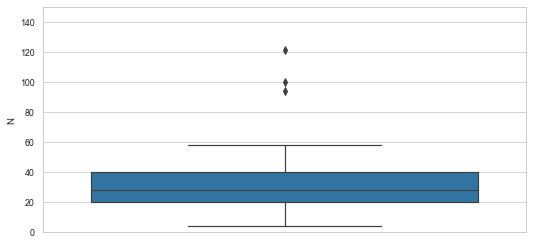

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
ax = sns.boxplot( y="N", data=participants_n)
plt.ylim(0, 150)
plt.show()

<AxesSubplot:ylabel='Frequency'>

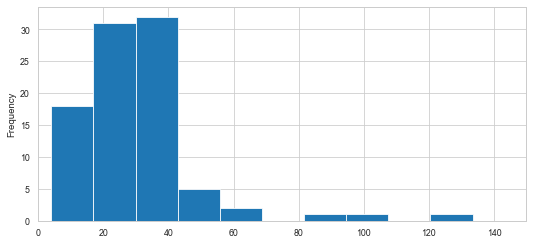

In [89]:
participants_n['N'].plot(bins = 35,kind ='hist', xlim = [0,150])

PERCENTAGE OF FEMALE SAMPLE

DOES NOT CLARIFY N_FEMALE

In [90]:
len(participants_n[participants_n['n_female']== '-'])

22

In [91]:
#Me quedo solo con las que aclaran female
female_participants_n = participants_n[participants_n['n_female']!= '-']


# CHANGE DTYPE
female_participants_n['n_female'] = female_participants_n['n_female'].astype('int')

#Caclulate percentage
female_participants_n['female_percentage'] = (female_participants_n['n_female'] *100)/female_participants_n['N']

C:\Users\agust\AppData\Local\Temp/ipykernel_32132/2500681657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_participants_n['n_female'] = female_participants_n['n_female'].astype('int')
C:\Users\agust\AppData\Local\Temp/ipykernel_32132/2500681657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_participants_n['female_percentage'] = (female_participants_n['n_female'] *100)/female_participants_n['N']


In [92]:
female_participants_n.loc[:,['paper_id','n_female', 'N', 'female_percentage']]

,paper_id,n_female,N,female_percentage
0,1,20,45,44.444444
2,3,16,32,50.000000
3,4,16,27,59.259259
4,5,27,27,100.000000
6,7,3,15,20.000000
...,...,...,...,...
101,94,13,40,32.500000
102,95,236,457,51.641138
103,96,13,40,32.500000
105,98,16,32,50.000000


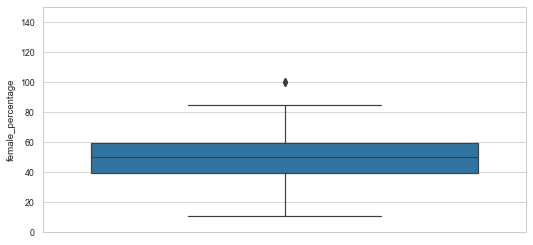

In [110]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
ax = sns.boxplot( y="female_percentage", data=female_participants_n)
plt.ylim(0, 150)
plt.show()

In [111]:
female_participants_n['female_percentage'].mean()

50.470916199466636

In [112]:
female_participants_n['female_percentage'].median()

50.0

In [93]:
mean_participants =participants_n.groupby(['paper_id', 'mean_age']).nth(0)
mean_participants.reset_index(inplace= True)

DOES NOT CLARIFY MEAN_AGE

In [94]:
len(mean_participants[mean_participants['mean_age'] == '-'])

36

In [95]:
mean_participants

,paper_id,mean_age,N,model_id,apa_citation,n_female,meadian_age,range_age,country
0,1,-,45,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",20,-,-,Spain
1,3,26.9,32,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",16,-,19-37,-
2,4,26.06,27,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",16,-,19-40,-
3,5,19.44,27,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,-,18-22,-
4,6,-,121,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",-,-,1-3,USA
...,...,...,...,...,...,...,...,...,...
92,96,28.3,40,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",13,-,-,-
93,97,20,22,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",-,-,-,Poland
94,98,26.9,32,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",16,-,19-37,-
95,99,30,58,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",21,-,-,-


In [96]:
mean_participants = mean_participants[mean_participants['mean_age'] != '-']

In [97]:
mean_participants['mean_age']

1      26.9
2     26.06
3     19.44
5      27.5
8     26.06
      ...  
90     28.3
92     28.3
93       20
94     26.9
95       30
Name: mean_age, Length: 61, dtype: object

In [98]:
mean_participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 95
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   paper_id      61 non-null     int64 
 1   mean_age      61 non-null     object
 2   N             61 non-null     int32 
 3   model_id      61 non-null     int64 
 4   apa_citation  61 non-null     object
 5   n_female      61 non-null     object
 6   meadian_age   61 non-null     object
 7   range_age     61 non-null     object
 8   country       61 non-null     object
dtypes: int32(1), int64(2), object(6)
memory usage: 4.5+ KB


In [99]:
mean_participants['mean_age'] = mean_participants['mean_age'].astype('float')

C:\Users\agust\AppData\Local\Temp/ipykernel_32132/1345193897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_participants['mean_age'] = mean_participants['mean_age'].astype('float')


<AxesSubplot:>

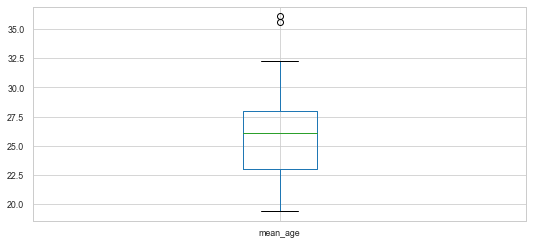

In [100]:
mean_participants.boxplot(column = ['mean_age'])

In [101]:
mean_participants['mean_age'].mean()

25.952459016393437

HASTA ACÁ ES LO MIO, LO SIGUIENTE ES UN CODIGO DE PRUEBA PARA EL GRAFO

In [102]:
self = pd.read_csv('../update_data/Tabla Normalizada - Self report.csv')

In [103]:
self.columns

Index(['paper_id', 'model_id', 'apa_citation', 'use_questionnaite',
       'affective_questionaire_SAM', 'affective_questionaire_PSS',
       'affective_questionaire_PANAS', 'affective_questionaire_DES',
       'affective_questionaire_affective_grid', 'is_dimensional',
       'dimension_valence', 'dimension_arousal', 'dimension_dominance',
       'dimension_like_or_dislike', 'dimension_familiarity',
       'dimension_stress', 'dimension_engagement', 'dimension_predictability',
       'is_categorial', 'Anger', 'Stress', 'Disgust', 'Fear', 'Sadness',
       'Surprise', 'Happiness', 'Pleasant', 'Unpleasant', 'Anxiety', 'Neutral',
       'Funny', 'Horror', 'Weepy', 'Boredom', 'Relaxation', 'Amusement',
       'Confusion', 'Curiosity', 'Delight', 'flow/engagement', 'Frustration',
       'Tenderness', 'Joy'],
      dtype='object')

In [104]:
self.fillna('-', inplace= True)

In [105]:
self_1 = self[self['is_categorial']!= '-']

In [106]:
#me quedo con la primera row de cada grupo
self_uniq = self_1.groupby(['paper_id','Anger',
       'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
       'Pleasant', 'Unpleasant', 'Anxiety', 'Neutral', 'Funny', 'Horror',
       'Weepy', 'Boredom', 'Relaxation', 'Amusement', 'Confusion', 'Curiosity',
       'Delight', 'flow/engagement', 'Frustration', 'Tenderness', 'Joy']).nth(0)

In [107]:
self_uniq

model_id  \
paper_id Anger Stress Disgust Fear Sadness Surprise Happiness Pleasant Unpleasant Anxiety Neutral Funny Horror Weepy Boredom Relaxation Amusement Confusion Curiosity Delight flow/engagement Frustration Tenderness Joy             
4        x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x           5   
10       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x          44   
16       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x          93   
20       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         130   
32       x     -      x       x    x       x        x         -        -          -       x       -     -      -     -       -          -         -         -         -       -               -           -          -         179   
35       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         195   
37       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         228   
                                                    x         -        -          -       x       -     -      -     -       -          -         -         -         -       -               -           -          -         235   
43       -     -      -       -    -       -        -         -        -          -       x       x     -      -     -       -          -         -         -         -       -               -           -          -         261   
60       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         304   
61       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         315   
62       -     -      -       -    -       -        -         -        -          -       -       -     -      -     x       -          -         -         -         -       -               -           -          -         330   
63       -     -      -       -    -       -        -         -        -          -       -       -     -      -     -       x          -         -         -         -       -               -           -          -         333   
65       x     -      x       x    x       x        x         -        -          -       x       -     -      -     -       -          -         -         -         -       -               -           -          -         344   
68       -     -      -       -    -       -        -         -        -          x       -       -     -      -     -       -          -         -         -         -       -               -           -          -         358   
70       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         360   
72       x     -      x       x    x       x        x         -        -      

In [108]:
self_uniq.reset_index(inplace=True)

In [109]:
self_uniq.loc[:,['paper_id','Anger',
       'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
       'Pleasant', 'Unpleasant', 'Anxiety', 'Neutral', 'Funny', 'Horror',
       'Weepy', 'Boredom', 'Relaxation', 'Amusement', 'Confusion', 'Curiosity',
       'Delight', 'flow/engagement', 'Frustration', 'Tenderness', 'Joy']]

,paper_id,Anger,Stress,Disgust,Fear,Sadness,Surprise,Happiness,Pleasant,Unpleasant,...,Boredom,Relaxation,Amusement,Confusion,Curiosity,Delight,flow/engagement,Frustration,Tenderness,Joy
0,4,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
1,10,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
2,16,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
3,20,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
4,32,x,-,x,x,x,x,x,-,-,...,-,-,-,-,-,-,-,-,-,-
5,35,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
6,37,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
7,37,x,-,x,x,x,x,x,-,-,...,-,-,-,-,-,-,-,-,-,-
8,43,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9,60,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
